In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pystan
%matplotlib inline

In [2]:
plt.style.use("ggplot")

In [3]:
df = pd.read_excel("./data/data.xlsx")

In [4]:
df.head()

,0
0,3.896195
1,5.865766
2,5.860887
3,4.660614
4,5.263595


(array([  1.,   1.,   5.,  12.,  10.,  18.,  16.,   8.,   5.,   4.]),
 array([ 2.29193477,  2.77510498,  3.25827519,  3.74144541,  4.22461562,
         4.70778584,  5.19095605,  5.67412627,  6.15729648,  6.64046669,
         7.12363691]),
 <a list of 10 Patch objects>)

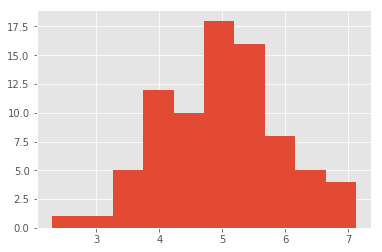

In [5]:
plt.hist(df[0])

In [6]:
stan_model = """
data {
  int N;
  real Y[N];
}

parameters {
  real mu;
  real<lower=0> sigma;
}

model {
  for (i in 1:N){
    Y[i] ~ normal(mu, sigma);
  }
}
"""

In [7]:
sm = pystan.StanModel(model_code=stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_4abdfcd24c05f6fb8dff0fb579217c90 NOW.


In [8]:
stan_data = {"N":df.shape[0], "Y":df[0]}

In [9]:
fit = sm.sampling(data=stan_data, iter=2000, chains = 3, warmup= 500, seed=123)

In [10]:
fit

Inference for Stan model: anon_model_4abdfcd24c05f6fb8dff0fb579217c90.
3 chains, each with iter=2000; warmup=500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=4500.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu      4.98  2.1e-3   0.11   4.76    4.9   4.98   5.05   5.19   2662    1.0
sigma   0.97  1.4e-3   0.08   0.83   0.92   0.97   1.02   1.15   3236    1.0
lp__  -37.13    0.03   1.08 -40.05  -37.5 -36.79 -36.36  -36.1   1581    1.0

Samples were drawn using NUTS at Sat Feb 17 20:19:35 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

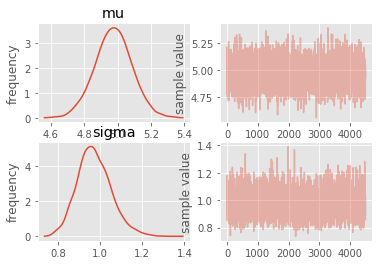

In [11]:
fig = fit.plot()